<a href="https://colab.research.google.com/github/sohan-bhat-git/Cricket_Analysis/blob/main/T20_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
ipl_bat_stats = pd.read_csv("drive/MyDrive/archive/IPL Player Stats - 2016 till 2019.csv")

In [3]:
ipl_bat_stats.columns = [c.replace(' ', '_') for c in ipl_bat_stats.columns]
ipl_bat_stats = ipl_bat_stats[ipl_bat_stats.Runds_Scored != '-']
runs_scored = ipl_bat_stats['Runds_Scored'].astype(str).astype(int).sum()
boundaries = ipl_bat_stats['4s'].astype(str).astype(int).sum() * 4
sixes = ipl_bat_stats['6s'].astype(str).astype(int).sum() * 6
other_runs = runs_scored - boundaries - sixes
bar_values = [boundaries, sixes, other_runs]
labels = ['Fours', 'Sixes', 'Other Runs']

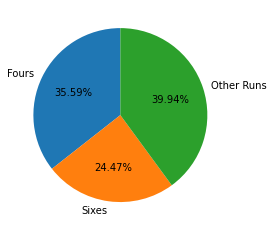

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.pie(bar_values, labels=labels, autopct='%.2f%%', startangle=90)
plt.show()

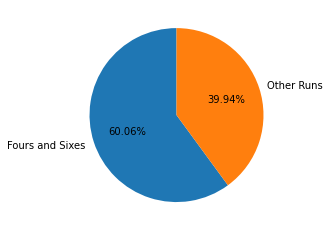

In [5]:
fours_sixes = boundaries + sixes 
bar_values = [fours_sixes, other_runs]
labels = ['Fours and Sixes', 'Other Runs']
plt.figure()
plt.pie(bar_values, labels=labels, autopct='%.2f%%', startangle=90)
plt.show()

In [7]:
ipl_bat_stats = ipl_bat_stats[ipl_bat_stats.Bowling_Economy_Rate != '-']
ipl_bat_stats = ipl_bat_stats[ipl_bat_stats.Bowling_Strike_Rate != '-']
ipl_bat_stats = ipl_bat_stats[ipl_bat_stats.Bowling_Average != '-']

In [67]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x = ipl_bat_stats['Bowling_Economy_Rate'].astype(str).astype(float)
y = ipl_bat_stats['Bowling_Strike_Rate'].astype(str).astype(float)
z = ipl_bat_stats['Wickets_Taken'].astype(str).astype(float)

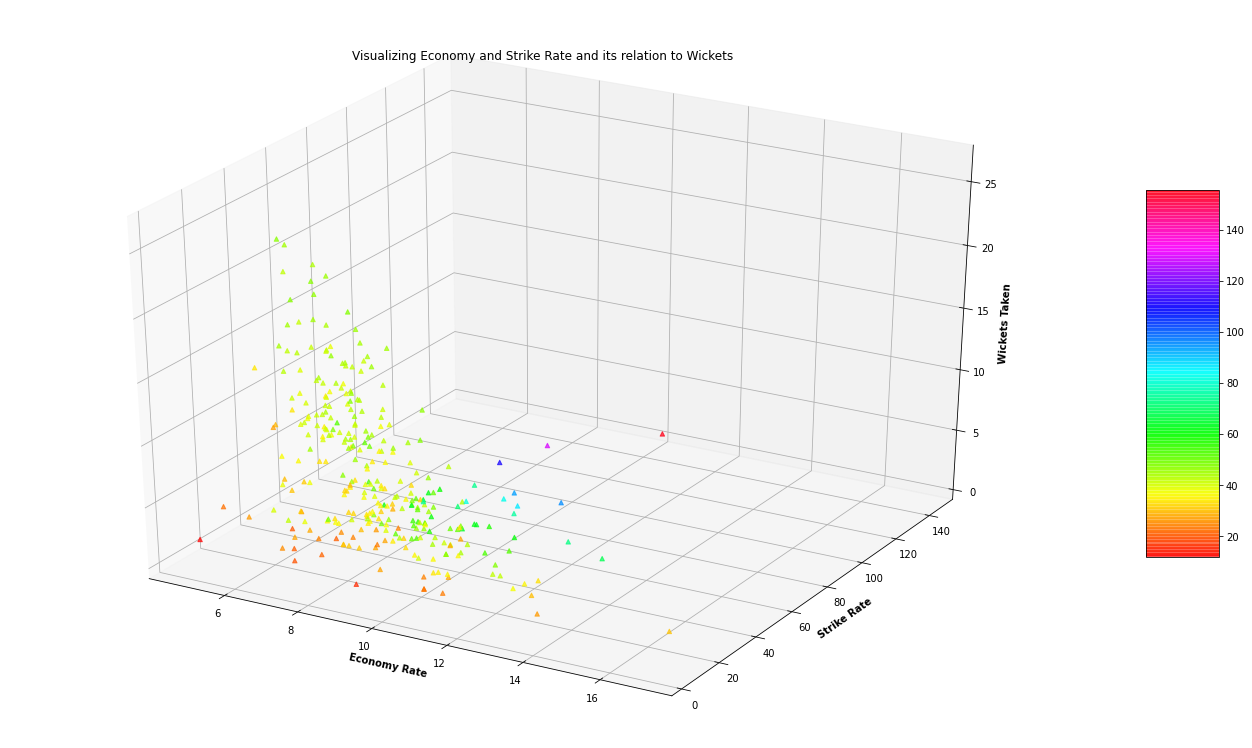

In [89]:
fig = plt.figure(figsize = (24, 13.5))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.7,
                    c = ((x + y + z)),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Visualizing Economy and Strike Rate and its relation to Wickets")
ax.set_xlabel('Economy Rate', fontweight ='bold')
ax.set_ylabel('Strike Rate', fontweight ='bold')
ax.set_zlabel('Wickets Taken', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()

Text(0.5, 1.0, 'Economy Rate vs. Wickets')

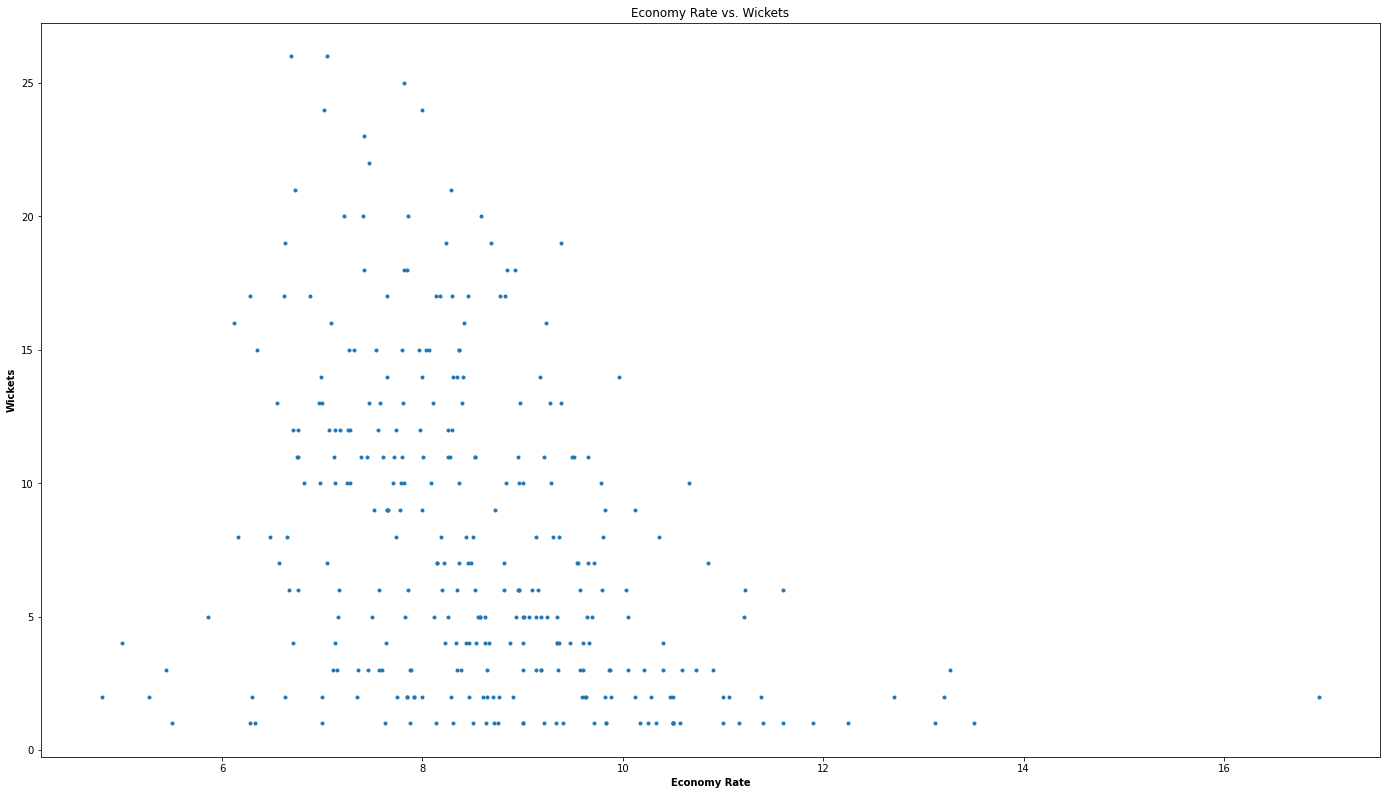

In [88]:
plt.figure(figsize = (24, 13.5))
plt.scatter(x, z, marker='.')
plt.xlabel('Economy Rate', fontweight ='bold')
plt.ylabel('Wickets', fontweight ='bold')
plt.title('Economy Rate vs. Wickets')